<a href="https://colab.research.google.com/github/tharun067/python_problems/blob/main/NLP_AD2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
text = ['Sarah lives in a hut in the village.',
        'She has an apple tree in her backyard.',
        'The apples are red in color.']
df = pd.DataFrame(text,columns=['Sentence'])
df

,Sentence
0,Sarah lives in a hut in the village.
1,She has an apple tree in her backyard.
2,The apples are red in color.


from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('Sentence').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
!pip install spacy

In [ ]:
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 43.0 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import spacy
nlp = spacy.load("en_core_web_sm")
token = []
pos = []
for sent in nlp.pipe(df['Sentence']):
  if sent.has_annotation('DEP'):
    token.append([word.text for word in sent])
    pos.append([word.pos_ for word in sent])

In [ ]:
token

[['Sarah', 'lives', 'in', 'a', 'hut', 'in', 'the', 'village', '.'],
 ['She', 'has', 'an', 'apple', 'tree', 'in', 'her', 'backyard', '.'],
 ['The', 'apples', 'are', 'red', 'in', 'color', '.']]

In [ ]:
pos

[['PROPN', 'VERB', 'ADP', 'DET', 'NOUN', 'ADP', 'DET', 'NOUN', 'PUNCT'],
 ['PRON', 'VERB', 'DET', 'NOUN', 'NOUN', 'ADP', 'PRON', 'NOUN', 'PUNCT'],
 ['DET', 'NOUN', 'AUX', 'ADJ', 'ADP', 'NOUN', 'PUNCT']]

In [ ]:
df['token'] =token
df['pos'] = pos

In [ ]:
df.head()

,Sentence,token,pos
0,Sarah lives in a hut in the village.,"[Sarah, lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ..."
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,..."
2,The apples are red in color.,"[The, apples, are, red, in, color, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]"


In [ ]:
df['noun'] =df.apply(lambda x:x['pos'].count('NOUN'),axis=1)
df['verb'] =df.apply(lambda x:x['pos'].count('VERB'),axis=1)
df['adj'] =df.apply(lambda x:x['pos'].count('ADJ'),axis=1)
df['punct'] =df.apply(lambda x:x['pos'].count('PUNCT'),axis=1)
df

,Sentence,token,pos,noun,verb,adj,punct
0,Sarah lives in a hut in the village.,"[Sarah, lives, in, a, hut, in, the, village, .]","[PROPN, VERB, ADP, DET, NOUN, ADP, DET, NOUN, ...",2,1,0,1
1,She has an apple tree in her backyard.,"[She, has, an, apple, tree, in, her, backyard, .]","[PRON, VERB, DET, NOUN, NOUN, ADP, PRON, NOUN,...",3,1,0,1
2,The apples are red in color.,"[The, apples, are, red, in, color, .]","[DET, NOUN, AUX, ADJ, ADP, NOUN, PUNCT]",2,0,1,1


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df = pd.read_csv('/content/tripadvisor_hotel_reviews.csv')
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [14]:
df['Rating'].value_counts()

,count
Rating,
5,9054
4,6039
3,2184
2,1793
1,1421


In [15]:
def rating(rating):
  if rating >3 and rating <=5:
    return "Positive"
  if rating > 0 and rating <=3:
    return "Negative"
df['Rating_Category'] = df['Rating'].apply(rating)

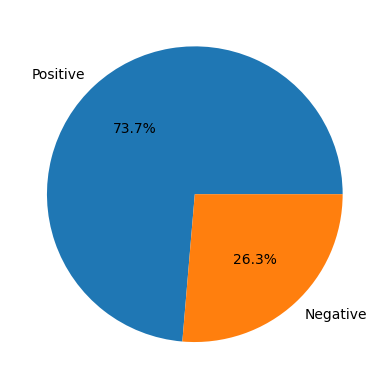

In [16]:
plt.pie(df['Rating_Category'].value_counts(),
        labels=df['Rating_Category'].unique().tolist(),
        autopct='%1.1f%%')
plt.show()

In [17]:
lenght = len(df['Review'][0])
print(f'lenght of first review: {lenght}')

lenght of first review: 593


In [18]:
df['Length'] = df['Review'].str.len()
df.head()

,Review,Rating,Rating_Category,Length
0,nice hotel expensive parking got good deal sta...,4,Positive,593
1,ok nothing special charge diamond member hilto...,2,Negative,1689
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281


In [19]:
word_count = df['Review'][0].split()
print(f'word count of first review: {len(word_count)}')

word count of first review: 87


In [20]:
def word_count(review):
  review_list = review.split()
  return len(review_list)
df['Word_Count'] = df['Review'].apply(word_count)
df.head()

,Review,Rating,Rating_Category,Length,Word_Count
0,nice hotel expensive parking got good deal sta...,4,Positive,593,87
1,ok nothing special charge diamond member hilto...,2,Negative,1689,250
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427,217
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191


In [21]:
df['mean_word_length'] = df['Review'].map(lambda rev :np.mean([len(word) for word in rev.split()]))
df.head()

,Review,Rating,Rating_Category,Length,Word_Count,mean_word_length
0,nice hotel expensive parking got good deal sta...,4,Positive,593,87,5.804598
1,ok nothing special charge diamond member hilto...,2,Negative,1689,250,5.752000
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427,217,5.571429
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89,5.730337
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191,5.701571


In [25]:
from nltk import tokenize
np.mean([len(sent) for sent in tokenize.sent_tokenize(df['Review'][0])])

591.0

In [26]:
df['mean_word_length'] = df['Review'].map(lambda rev :np.mean([len(sent) for sent in tokenize.sent_tokenize(rev)]))
df.head()

,Review,Rating,Rating_Category,Length,Word_Count,mean_word_length
0,nice hotel expensive parking got good deal sta...,4,Positive,593,87,591.0
1,ok nothing special charge diamond member hilto...,2,Negative,1689,250,1687.0
2,nice rooms not 4* experience hotel monaco seat...,3,Negative,1427,217,712.0
3,"unique, great stay, wonderful time hotel monac...",5,Positive,600,89,598.0
4,"great stay great stay, went seahawk game aweso...",5,Positive,1281,191,1279.0
